In [ ]:
Hash Table 

1. 202. Happy Number
2. 645. Set mismatch
3. 290. word pattern
4. 599. minimum index sum of two lists
5. 748. shortest completing word
6. 771. jewels and stones
7. 463. island perimeter
8. 594. longest harmonious subsequence
9. 500. keyboard row
10. 781. rabbits in forest 


In [ ]:
1. 202. Happy Number

Solution 1. hashset 

In [ ]:
class Solution:
    def isHappy(self, n: int) -> bool:
        def count(n):
            sum = 0
            for i in range(len(str(n))):
                sum += int(str(n)[i])**2
            return sum
        
        seen = set()
        res = count(n)
        while res != 1:
            if res in seen:
                return False
            seen.add(res)
            res = count(res)
        return True
#T: O(N) ? for count...
#S:

In [ ]:
def isHappy(self, n: int) -> bool:

    def get_next(n):
        total_sum = 0
        while n > 0:
            #divmod ???
            n, digit = divmod(n, 10)
            total_sum += digit ** 2
        return total_sum

    seen = set()
    while n != 1 and n not in seen:
        seen.add(n)
        n = get_next(n)

    return n == 1
#T：O(logN) count for a given number has a cost of O(logN) because we are processing each digit in the number,
#and the number of digits in a number is given by logN.
#S: O(logN) hash set size 

divmod() Return Value
The divmod() method returns:

(quotient, remainder) - a tuple that contains quotient and remainder of the division

In [4]:
n = 19
n, digit = divmod(n, 10)
print(divmod(355, 10))
print(n)
print(digit)

(35, 5)
1
9


Solution 2: tortoise and hare 

In [ ]:
def isHappy(self, n: int) -> bool:  
    def get_next(number):
        total_sum = 0
        while number > 0:
            number, digit = divmod(number, 10)
            total_sum += digit ** 2
        return total_sum

    slow_runner = n
    fast_runner = get_next(n)
    while fast_runner != 1 and slow_runner != fast_runner:
        slow_runner = get_next(slow_runner)
        fast_runner = get_next(get_next(fast_runner))
    return fast_runner == 1

#T:O(logN)
#T:O(1)

Regardless of where the tortoise and hare start in the cycle, they are guaranteed to eventually meet. This is because the hare moves one node closer to the tortoise (in their direction of movement) each step.

In [ ]:
Solution 3. 快乐数很多？不快乐的只有。。。
263???
 cycle_members = {4, 16, 37, 58, 89, 145, 42, 20}

In [ ]:
def isHappy(self, n: int) -> bool:

    cycle_members = {4, 16, 37, 58, 89, 145, 42, 20}

    def get_next(number):
        total_sum = 0
        while number > 0:
            number, digit = divmod(number, 10)
            total_sum += digit ** 2
        return total_sum

    while n != 1 and n not in cycle_members:
        n = get_next(n)

    return n == 1

#T:O(logN)
#T:O(1)

only hard code 1 and 4

4→16→37→58→89→145→42→20→4

In [ ]:
class Solution:
    
    def isHappy(self, n: int) -> bool:
        
        def get_next(number):
            total_sum = 0
            while number > 0:
                number, digit = divmod(number, 10)
                total_sum += digit ** 2
            return total_sum
        
        while n != 1 and n != 4:
            n = get_next(n)
            
        return n == 1
#T:O(logN)
#T:O(1)

In [ ]:
2. 645. Set mismatch
hash table
循环数组
数学

In [ ]:
class Solution:
    def findErrorNums(self, nums: List[int]) -> List[int]:
                               
        dict = {key: 0 for key in range(1,len(nums) + 1)}
        for e in nums:
            dict[e] = dict.get(e) + 1
        
        #the order matters, duplicate first, missing second 
        ans = [0,0]
        
        for e in dict:
            if dict[e] > 1:
                ans[0] = e
            if dict[e] == 0:
                ans[1] = e
        return ans
#T: O(N)
#T: O(N)

In [4]:
dict = {key: 0 for key in range(1,4 + 1)}
dict

{1: 0, 2: 0, 3: 0, 4: 0}

In [ ]:
from collections import Counter
class Solution:
    def findErrorNums(self, nums: List[int]) -> List[int]:
        c = Counter(nums)

        a, b = 0, 0
        for num in range(1, len(nums)+1):
            if c[num] == 0:
                b = num 
            if c[num] == 2:
                a = num

        return [a, b]

作者：niconiconi-12
链接：https://leetcode.cn/problems/set-mismatch/solution/chi-xiao-dou-python-kuai-su-jie-da-ji-qi-qy9x/


In [41]:
from collections import Counter
nums = ['a','b','2','4',2]
nums1 = [1,2,2,4]
c = Counter(nums)
d = Counter(nums1)
#counter 如果找不到，默认是0 
print(c)
print(c['a'])
print(d['a'])


Counter({'a': 1, 'b': 1, '2': 1, '4': 1, 2: 1})
1
0


In [ ]:
#dict 没有这个默认

dict = {1:1,2:2,4:1}
print(dict[3])

In [ ]:
class Solution:
    def findErrorNums(self, nums: List[int]) -> List[int]:
        total = sum(range(1,len(nums)+1))
        num = total - sum(set(nums))
        diff = total - sum(nums)
        return [num-diff,num]
#duplicate, missing 
[1,2,2,4]
#  3 >>2 
#missing 3, sum diff is 1 

作者：100000000000001
链接：https://leetcode.cn/problems/set-mismatch/solution/shu-xue-qiu-he-fa-si-lu-jian-dan-xing-ne-2zpk/
#T: O(1)
#T: O(1)
这道题做不出来的，肯定是上学的时候数学老师长得不够漂亮！

负号标记，重复的和缺失的都会是正的
然后调整一下顺序

In [12]:
nums = [1,2,2,4]


def findErrorNums(nums):
    #mark negative, duplicate marked twice will be positive, missing marked 0 times, positive 
    for num in nums:
        nums[abs(num) - 1] *= -1
    ##list comprehension   
    res = [i + 1 for i, num in enumerate(nums) if num > 0
    
    return res if res[0] in map(abs, nums) else res[::-1]


[1, 2, 2, 4]

In [ ]:
class Solution:
    def findErrorNums(self, nums: List[int]) -> List[int]:
        
        for num in nums:
            nums[abs(num) - 1] *= -1
            
        res = []
        
        for i in range(len(nums)):
            if nums[i] > 0:
                res.append(i+1)
                
        #nums = map(abs,nums)
        for i in range(len(nums)):
            nums[i] = abs(nums[i])
        
        if res[0] in nums:
            return res
        else:
            return res[::-1]

3. 290. word pattern
Given a pattern and a string s, find if s follows the same pattern.

Here follow means a full match, such that there is a bijection between a letter in pattern and a non-empty word in s.

在本题中，我们需要判断字符与字符串之间是否恰好一一对应。即任意一个字符都对应着唯一的字符串，任意一个字符串也只被唯一的一个字符对应。在集合论中，这种关系被称为「双射」。
bijection


作者：LeetCode-Solution
链接：https://leetcode.cn/problems/word-pattern/solution/dan-ci-gui-lu-by-leetcode-solution-6vqv/


Solution 1 two hash map 

zip
The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.


In [18]:
pattern = "abba" a:3, b:2
s = "dog cat cat cog"  dog: 0, cat :2, cog :3 
words = s.split(" ")
words

a = zip(pattern,words)
print(list(a))

[('a', 'dog'), ('b', 'cat'), ('b', 'cat'), ('a', 'cog')]


In [ ]:
class Solution:
    def wordPattern(self, pattern: str, s: str) -> bool:
        map_char = {}
        map_word = {}
        
        words = s.split(' ')
        if len(words) != len(pattern):
            return False
        
        for c, w in zip(pattern, words):
            if c not in map_char:
                if w in map_word:
                    return False
                else:
                    map_char[c] = w
                    map_word[w] = c
            else:
                if map_char[c] != w:
                    return False
        return True
#T: O(N) N number of words in s or number of characters in pattern 
#S: O(M) M represents the number of unique words in s. Even though we have two hash maps, 
#the character to word hash map has space complexity of O(1) since there can at most be 26 keys.

In [ ]:
class Solution:
    def wordPattern(self, pattern: str, s: str) -> bool:
        word2ch = dict()
        ch2word = dict()
        words = s.split()
        if len(pattern) != len(words):
            return False
        
        for ch, word in zip(pattern, words):
            if (word in word2ch and word2ch[word] != ch) or (ch in ch2word and ch2word[ch] != word):
                return False
            word2ch[word] = ch
            ch2word[ch] = word
    
        return True


时间复杂度：O(n + m)其中 n 为 pattern 的长度，m 为 str 的长度。插入和查询哈希表的均摊时间复杂度均为 O(n + m)。每一个字符至多只被遍历一次。

空间复杂度：O(n + m)，其中 n 为pattern 的长度，m 为 str 的长度。最坏情况下，我们需要存储 pattern 中的每一个字符和str 中的每一个字符串。

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/word-pattern/solution/dan-ci-gui-lu-by-leetcode-solution-6vqv/


Solution 2. Single Index Hash Map 

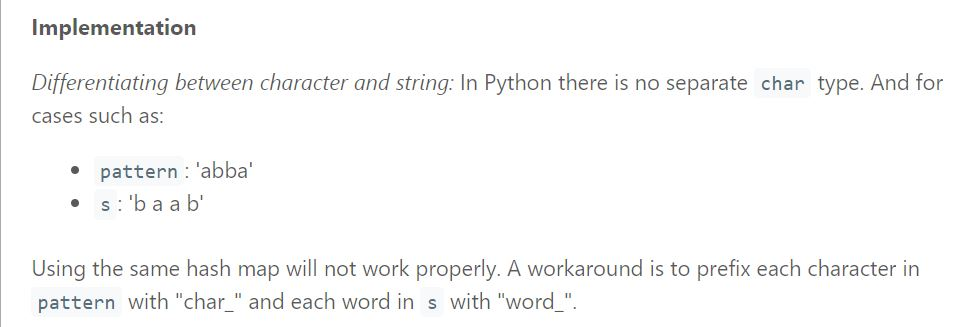

In [ ]:
class Solution:
    def wordPattern(self, pattern: str, s: str) -> bool:
        map_index = {}
        words = s.split()
        
        if len(pattern) != len(words):
            return False
        
        for i in range(len(words)):
            c = pattern[i]
            w = words[i]
            
            # it can be anything, just need to be different to distinguish 
            #char_key = 'a{}'.format(c)
            #char_word = 'b{}'.format(w)
            

            char_key = 'char_{}'.format(c)
            char_word = 'word_{}'.format(w)
            
            if char_key not in map_index:
                map_index[char_key] = i
            
            if char_word not in map_index:
                map_index[char_word] = i 
            
            if map_index[char_key] != map_index[char_word]:
                return False
        
        return True

In [ ]:
"abc"
"b c a"

In [45]:
char_key = 'char_{}'.format(2)
char_key

'char_2'

In [ ]:
class Solution:
    def wordPattern(self, pattern: str, s: str) -> bool:
        map_index = {}
        words = s.split()
        
        if len(pattern) != len(words):
            return False
        d1= {}
        d2 = {}
        
        for i in range(len(pattern)):
            d1[pattern[i]] = []
            d2[words[i]] = []
        
        for i in range(len(pattern)):
            d1[pattern[i]].append(i)
            d2[words[i]].append(i)
        
        return list(d1.values()) == list(d2.values())

In [ ]:
4. 599. minimum index sum of two lists

In [ ]:
class Solution:
    def findRestaurant(self, list1: List[str], list2: List[str]) -> List[str]:
        index = {s: i for i, s in enumerate(list1)}
        ans = []
        #need to have this indexSum
        indexSum = inf
        for i, s in enumerate(list2):
            if s in index:
                j = index[s]
                if i + j < indexSum:
                    indexSum = i + j
                    #we might have more than one, create a list here 
                    ans = [s]
                elif i + j == indexSum:
                    ans.append(s)
        return ans

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/minimum-index-sum-of-two-lists/solution/liang-ge-lie-biao-de-zui-xiao-suo-yin-zo-5m9w/


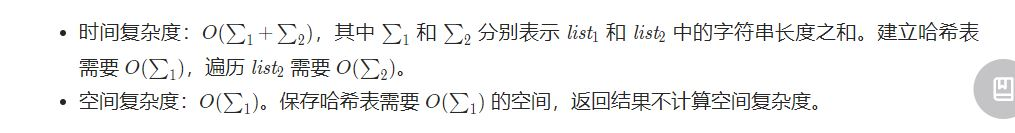

In [ ]:
class Solution:
    def findRestaurant(self, list1: List[str], list2: List[str]) -> List[str]:
        
        dict ={}
        
        ans = []
        #here we store the indexsum and check one by one...stack...
        indexSum = inf 
        # dict = {v:i for i, v in enumerate(list1)}
        for i, v in enumerate(list1):
            dict[v] = i
        
        for i,v in enumerate(list2):
            if v in dict: 
                if i + dict[v] < indexSum:
                    indexSum = i + dict[v]
                    ans = [v]
                elif i + dict[v] == indexSum:
                    ans.append(v)
        return ans
#T: O(N+M)  Every item of list2 is checked in a map of list1. N and M are the lengths of list1 and list2 respectively.
#S:O(N) N is first list


In [ ]:
5. 748. shortest completing word

In [ ]:
class Solution:
    def shortestCompletingWord(self, licensePlate: str, words: List[str]) -> str:        search_words = ""
        
        for e in licensePlate:
            if e.isalpha():
                search_words += e.lower()

In [ ]:
class Solution:
    def shortestCompletingWord(self, licensePlate: str, words: List[str]) -> str:
        cnt = Counter(ch.lower() for ch in licensePlate if ch.isalpha())
        #spst
        #'s':2,'p':2,'t':1
        #cnt - counter(word) == 0, we choose the word 
        return min((word for word in words if not cnt - Counter(word)), key=len)
    


作者：LeetCode-Solution
链接：https://leetcode.cn/problems/shortest-completing-word/solution/zui-duan-bu-quan-ci-by-leetcode-solution-35pt/
#T: O(N+M)
#S: O(N +M)

In [11]:
from collections import Counter
c1 = 'sspptt'
c2 = 'ssspptt'
c3 = 'sspptta'
c4 = 'spt'
print(Counter(c1) - Counter(c2))
print(Counter(c2) - Counter(c1))
print(Counter(c1) - Counter(c1))
print(Counter(c1) - Counter(c3))
print(Counter(c1) - Counter(c4))

Counter()
Counter({'s': 1})
Counter()
Counter()
Counter({'s': 1, 'p': 1, 't': 1})


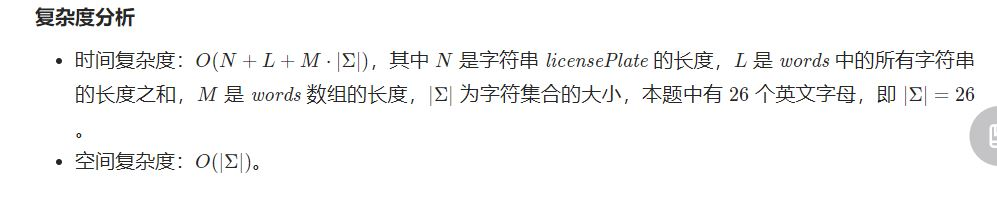

In [ ]:
class Solution:
    def shortestCompletingWord(self, licensePlate: str, words: List[str]) -> str:
        lp=collections.Counter([ l.lower()  for l in licensePlate if l.isalpha() ])
        words.sort(key = lambda s: len(s))
        for w in words:
            #s:2,p:2,t:2
            for i,v in lp.items():
                if w.count(i)<v:
                    break
            #this else is interesting, it is linked to if, but they can be in different indentation?
            #and we need this else to ensure we go over all the i,v without break
            else:
                return w
#https://leetcode.com/problems/shortest-completing-word/discuss/549376/python-greater-99-explained-with-tips

#T O(NlogN) we did sort ? although we have two for, iv in items only O(26)
#S:O(N)

In [ ]:
def shortestCompletingWord(self, licensePlate: str, words: List[str]) -> str:
        # removing digit and space from licensePlate
        licensePlate = ''.join([i.lower() for i in licensePlate if i.isalpha()])
        # sorting words array based on length of item
        words = sorted(words, key=len)
        for word in words:
            for i in range(len(licensePlate)):
                if word.count(licensePlate[i]) < licensePlate.count(licensePlate[i]):
                    break
                #we reach the end, and everything is longer than in licenseplate, this is a complete word
                #and we already sort, so this is the shortest one
                #this might be wrong, although it can pass leetcode, it did go over all, but maybe we break at the last one!!!
                if i == len(licensePlate)-1: 
                    return word

6. 771. jewels and stones

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        
        dict = {key: 0 for key in jewels}
        for e in stones:
            if e in dict:
                dict[e] += 1
            
        return sum(dict.values())
     
#T: O(N)
#S: O(N)

1. brute force

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        sum = 0
        for e in stones:
            if e in jewels:
                sum += 1
        return sum

In [ ]:
class Solution(object):
    def numJewelsInStones(self, jewels, stones):
        return sum(s in jewels for s in stones)
#T: O(J.length * S.length)
#S: O(1)

2. hash set

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        sum = 0
        j = set(jewels)
        for e in stones:
            if e in j:
                sum += 1
        return sum

In [ ]:
class Solution(object):
    def numJewelsInStones(self, jewels, stones):
        Jset = set(jewels)
        return sum(s in Jset for s in stones)
#T: O(J.length + S.length)
#S: O(J.length)

In [ ]:
7. 463. island perimeter
#https://www.youtube.com/watch?v=fISIuAFRM2s

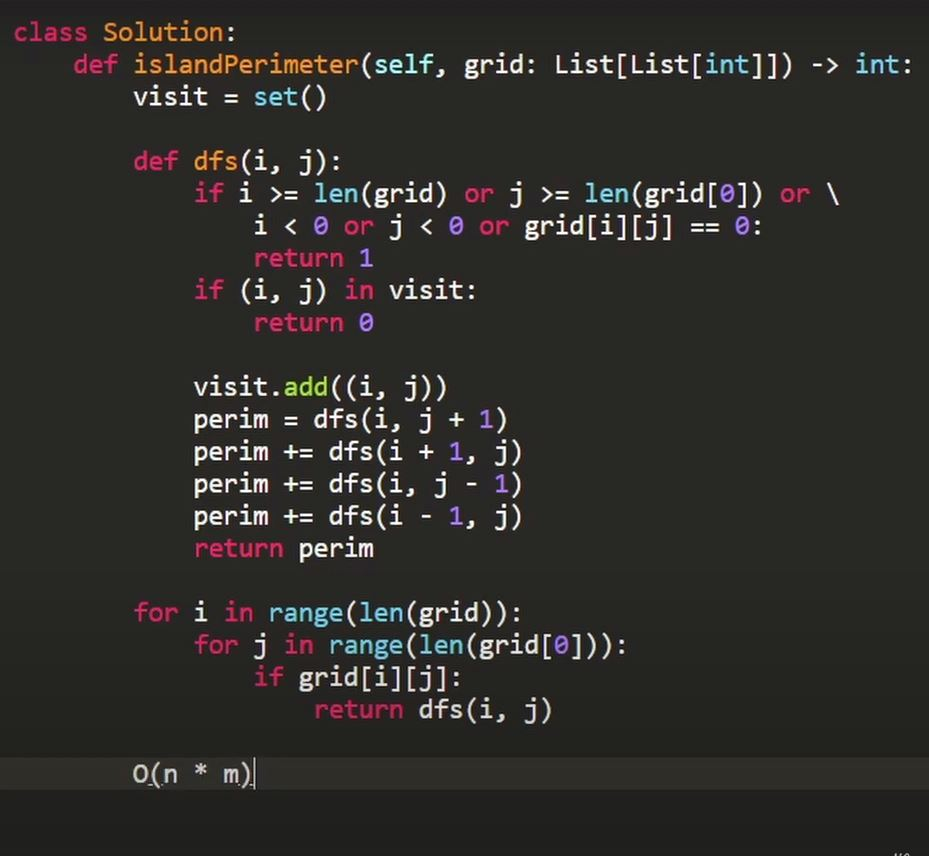

In [ ]:
vs. 200 number of islands

In [ ]:
class Solution:
    def dfs(self, grid, r, c):
        grid[r][c] = 0
        nr, nc = len(grid), len(grid[0])
        for x, y in [(r - 1, c), (r + 1, c), (r, c - 1), (r, c + 1)]:
            if 0 <= x < nr and 0 <= y < nc and grid[x][y] == "1":
                self.dfs(grid, x, y)

    def numIslands(self, grid: List[List[str]]) -> int:
        nr = len(grid)
        if nr == 0:
            return 0
        nc = len(grid[0])

        num_islands = 0
        for r in range(nr):
            for c in range(nc):
                if grid[r][c] == "1":
                    num_islands += 1
                    self.dfs(grid, r, c)
        
        return num_islands

#T: O(M*N)
#S: O(M*N)
作者：LeetCode
链接：https://leetcode.cn/problems/number-of-islands/solution/dao-yu-shu-liang-by-leetcode/


In [ ]:
8. 594. longest harmonious subsequence

In [ ]:
class Solution:
    def findLHS(self, nums: List[int]) -> int:
        dict = Counter(nums)
        ans = 0
        for e in dict:
            if e - 1 in dict:
                #we can only have 2 numbers in our result, and the length is the sum of the counts of each number
                ans = max(ans,dict[e] + dict[e-1])
        return ans
#T: O(N) if statement is O(1)
#S:O(N) hmmm..but we only get number 0...9 so O(1)

In [ ]:
class Solution:
    def findLHS(self, nums: List[int]) -> int:
        cnt = Counter(nums)
        return max((val + cnt[key + 1] for key, val in cnt.items() if key + 1 in cnt), default=0)

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/longest-harmonious-subsequence/solution/zui-chang-he-xie-zi-xu-lie-by-leetcode-s-8cyr/


In [ ]:
9. 500. keyboard row

In [ ]:
class Solution:
    def findWords(self, words: List[str]) -> List[str]:
        
        set1 = {'q','w','e','r','t','y','u','i','o','p'}
        set2 = {'a','s','d','f','g','h','j','k','l'}
        set3 = {'z','x','c','v','b','n','m'}
        
        res = []
        for i in words:
            wordset = set(i.lower())
            #set intersection
            if (wordset&set1 == wordset) or (wordset&set2 == wordset) or (wordset&set3 == wordset):
                res.append(i)
        return res
#T: O(N) N is length of words
#S: O(M) M = length of set1 + set2 + set3 

In [ ]:
LINES = [set("qwertyuiop"), set("asdfghjkl"), set("zxcvbnm")]
class Solution:
    def findWords(self, words: List[str]) -> List[str]:
        ans = [word for word in words if any(set(word.lower()).issubset(LINE) for LINE in LINES)]
        return ans
# 返回列表中的元素 - 列表生成式，返回iterable中所有满足condition（为True）的所有元素 [x for x in iterable if condition]
#取集合：           set(word.lower())                                  返回：集合
#是子集：           set(word.lower()).issubset(x)   传入：集合           返回：Ture/False
#是任意一行的子集：   any(iterable)                   传入：T/F的可迭代对象 返回：存在Ture就返回True，否则返回False


In [ ]:
10. 781. rabbits in forest 

In [ ]:
class Solution:
    def numRabbits(self, answers: List[int]) -> int:
        return sum([ceil(j/(i+1))*(i+1) for i, j in Counter(answers).items()])
    
#i = 1, j = 3
#  ceil(3 / (i+1)) * (i+1)
# 红色，红色；绿色，蓝色，
#ceil（j/(i+1)）最少有几组不同颜色的兔子。。。（i+1）= 每组兔子的数量，她说的别的兔子个数+自己。。。


作者：ting-ting-28
链接：https://leetcode.cn/problems/rabbits-in-forest/solution/python3-yi-xing-dai-ma-xiang-xi-tu-jie-b-ov25/


In [ ]:
说谎的兔子要吞一千根针。
——林宥嘉《说谎的兔子》

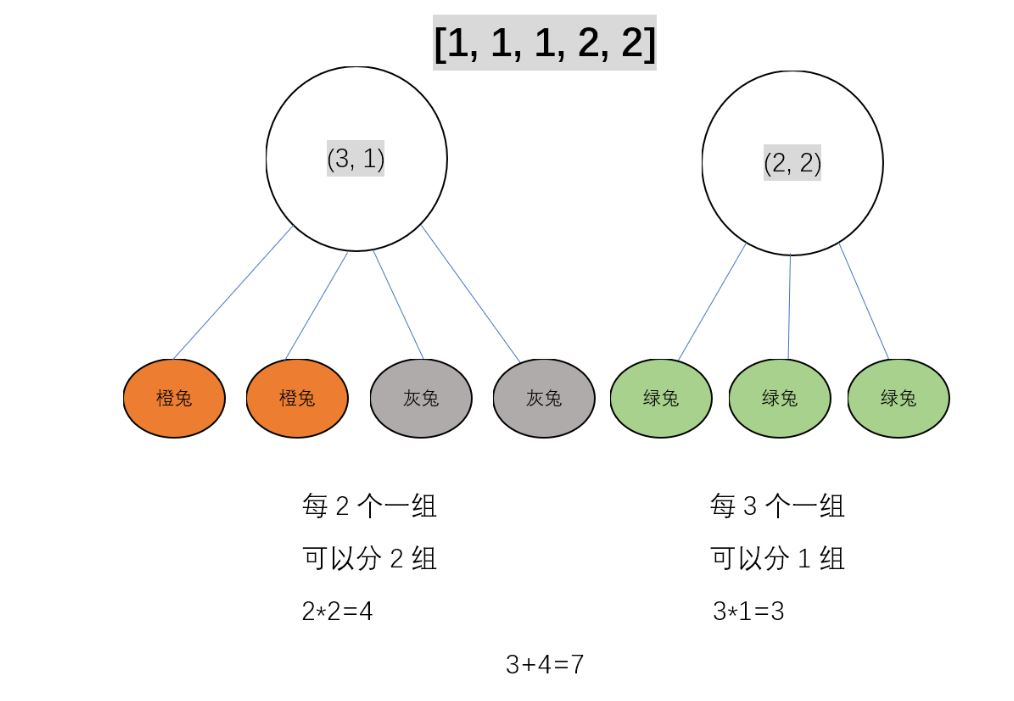